In [414]:
import json
import time
import plotly.express as px  
# Opening JSON file
f = open('data.json')
  
# Returns JSON object as a dictionary
data = json.load(f)

In [415]:
# Iterating through the json list
for event in data['events']:
    print(event)
  
# Closing file
#f.close()

{'objects': [{'objectType': 'Node', 'objectName': 'NodeA'}, {'objectType': 'Pod', 'objectName': 'PodA'}, {'objectType': 'Volume', 'objectName': 'VolumeA'}], 'start': '', 'finish': '1664234235000', 'eventType': '', 'eventName': 'Create'}
{'objects': [{'objectType': 'Node', 'objectName': 'NodeA'}, {'objectType': 'Pod', 'objectName': 'PodA'}, {'objectType': 'Volume', 'objectName': 'VolumeA'}], 'start': '1664234235000', 'finish': '1664234295000', 'eventType': '', 'eventName': 'Attach'}
{'objects': [{'objectType': 'Node', 'objectName': 'NodeA'}, {'objectType': 'Pod', 'objectName': 'PodA'}, {'objectType': 'Volume', 'objectName': 'VolumeA'}], 'start': '1664234295000', 'finish': '1664234355000', 'eventType': '', 'eventName': 'Mount'}
{'objects': [{'objectType': 'Node', 'objectName': 'NodeB'}, {'objectType': 'Pod', 'objectName': 'PodB'}, {'objectType': 'Volume', 'objectName': 'VolumeA'}], 'start': '1664234355000', 'finish': '', 'eventType': '', 'eventName': 'Mount'}
{'objects': [{'objectType': 

In [416]:
maxTime = "23242388000"
minTime = "33473607188000"

# Debugging Logs
for events in data['events']:
    #print(obj)
    x = False
    if x == True:
        print(events['objects'])
        print(events['start'])
        print(events['finish'])
        print(events['eventName'])
        print(events['eventType'])
    
    if len(minTime) == 0:
        if len(events['start']) > 0:
            minTime = events['start']
        else:
            maxTime = events['finish']
    print(minTime)
    print(events['start'])    
    if len(events['start']) > 0 and int(events['start']) < int(minTime):
        minTime = events['start']
            
    if len(events['finish']) > 0 and int(events['finish']) > int(maxTime):
        maxTime = events['finish']
        
    objects = events['objects']

    for obj in objects:
        if x == True:
            print(obj['objectType'])
            print(obj['objectName'])
    print("-----------------------")
print("Min Time : " + minTime)
print("Max Time : " + maxTime)


33473607188000

-----------------------
33473607188000
1664234235000
-----------------------
1664234235000
1664234295000
-----------------------
1664234235000
1664234355000
-----------------------
1664234235000
1664234235000
-----------------------
1664234235000
1664234430000
-----------------------
1664234235000
1664234415000
-----------------------
1664234235000
1664234430000
-----------------------
Min Time : 1664234235000
Max Time : 1664234490000


In [417]:
 import datetime
class Events:
    def __init__(self, node, start, finish, eventName, eventType, eventObject):
        self.node = node
        self.start = start
        self.finish = finish
        self.eventName=eventName
        self.eventType=eventType
        self.eventObject=eventObject
    def __init__(self):
        self.node = ""
        self.start = ""
        self.finish = ""
        self.eventName= ""
        self.eventType= ""
        self.eventObject= ""
    def to_dict(self):
        my_time = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(1347517370))
        datetime.datetime.fromtimestamp(1347517370).strftime('%Y-%m-%d %H:%M:%S')
        
        if len(events['start']) == 0:
            self.start = minTime
                
        if len(events['finish']) == 0:
            self.finish = maxTime
        
        print(minTime)
        print(maxTime)
        start = datetime.datetime.fromtimestamp(int(self.start) / 1000).strftime('%Y-%m-%d %H:%M:%S')
        end = datetime.datetime.fromtimestamp(int(self.finish) / 1000).strftime('%Y-%m-%d %H:%M:%S')
        return {
            'node': self.node,
            'start': start ,
            'finish': end,
            'eventName': self.eventName,
            'eventType': self.eventType,
            'eventObject': self.eventObject
        }

In [418]:
# Create an event list to be used as dataframe
eventList = []

totalNodes = set()
for events in data['events']:
    e = Events()        
    
    e.start=events['start']
    if len(events['start']) == 0:
        e.start = minTime
    
    e.finish=events['finish']
    if len(events['finish']) == 0:
        e.finish = maxTime
        
    e.eventName=events['eventName']
    e.eventType=events['eventType']
    
    objects = events['objects']
    #objectList = []
    objectString = ""
    for obj in objects:
        # Update node type to separate graphs
        if obj['objectType'] == "Node":
            e.node = obj['objectName']
            totalNodes.add(e.node )
        else:
            #objectList.append(obj['objectType'] + ":" + obj['objectName'])
            objectString +=  " " + obj['objectType'] + ":" + obj['objectName']
    e.eventObject =  objectString
    eventList.append(e.to_dict())

print(eventList)

1664234235000
1664234490000
1664234235000
1664234490000
1664234235000
1664234490000
1664234235000
1664234490000
1664234235000
1664234490000
1664234235000
1664234490000
1664234235000
1664234490000
1664234235000
1664234490000
[{'node': 'NodeA', 'start': '2022-09-26 16:17:15', 'finish': '2022-09-26 16:17:15', 'eventName': 'Create', 'eventType': '', 'eventObject': ' Pod:PodA Volume:VolumeA'}, {'node': 'NodeA', 'start': '2022-09-26 16:17:15', 'finish': '2022-09-26 16:18:15', 'eventName': 'Attach', 'eventType': '', 'eventObject': ' Pod:PodA Volume:VolumeA'}, {'node': 'NodeA', 'start': '2022-09-26 16:18:15', 'finish': '2022-09-26 16:19:15', 'eventName': 'Mount', 'eventType': '', 'eventObject': ' Pod:PodA Volume:VolumeA'}, {'node': 'NodeB', 'start': '2022-09-26 16:19:15', 'finish': '2022-09-26 16:21:30', 'eventName': 'Mount', 'eventType': '', 'eventObject': ' Pod:PodB Volume:VolumeA'}, {'node': 'NodeA', 'start': '2022-09-26 16:17:15', 'finish': '2022-09-26 16:17:15', 'eventName': 'Creating', '

In [419]:
fitinTimeLine = False
if fitinTimeLine == True:
    for e in eventList:
        print(e)

    for val in totalNodes:
        eMin = Events()
        eMin.node = val
        eMin.start = minTime
        eMin.finish = minTime
        eventList.append(eMin.to_dict())

        eMax = Events()
        eMax.node = val
        eMax.start = maxTime
        eMax.finish = maxTime
        eventList.append(eMax.to_dict())

    for e in eventList:
        print(e)
    

In [420]:
import pandas as pd
import plotly.graph_objs as go
df = pd.DataFrame(eventList)
df.head(20)

,node,start,finish,eventName,eventType,eventObject
0,NodeA,2022-09-26 16:17:15,2022-09-26 16:17:15,Create,,Pod:PodA Volume:VolumeA
1,NodeA,2022-09-26 16:17:15,2022-09-26 16:18:15,Attach,,Pod:PodA Volume:VolumeA
2,NodeA,2022-09-26 16:18:15,2022-09-26 16:19:15,Mount,,Pod:PodA Volume:VolumeA
3,NodeB,2022-09-26 16:19:15,2022-09-26 16:21:30,Mount,,Pod:PodB Volume:VolumeA
4,NodeA,2022-09-26 16:17:15,2022-09-26 16:17:15,Creating,,Portworx:Portworx
5,NodeA,2022-09-26 16:20:30,2022-09-26 16:21:30,Running,,Portworx:Portworx
6,NodeB,2022-09-26 16:20:15,2022-09-26 16:20:30,Creating,,Portworx:Portworx
7,NodeB,2022-09-26 16:20:30,2022-09-26 16:17:15,Running,,Portworx:Portworx


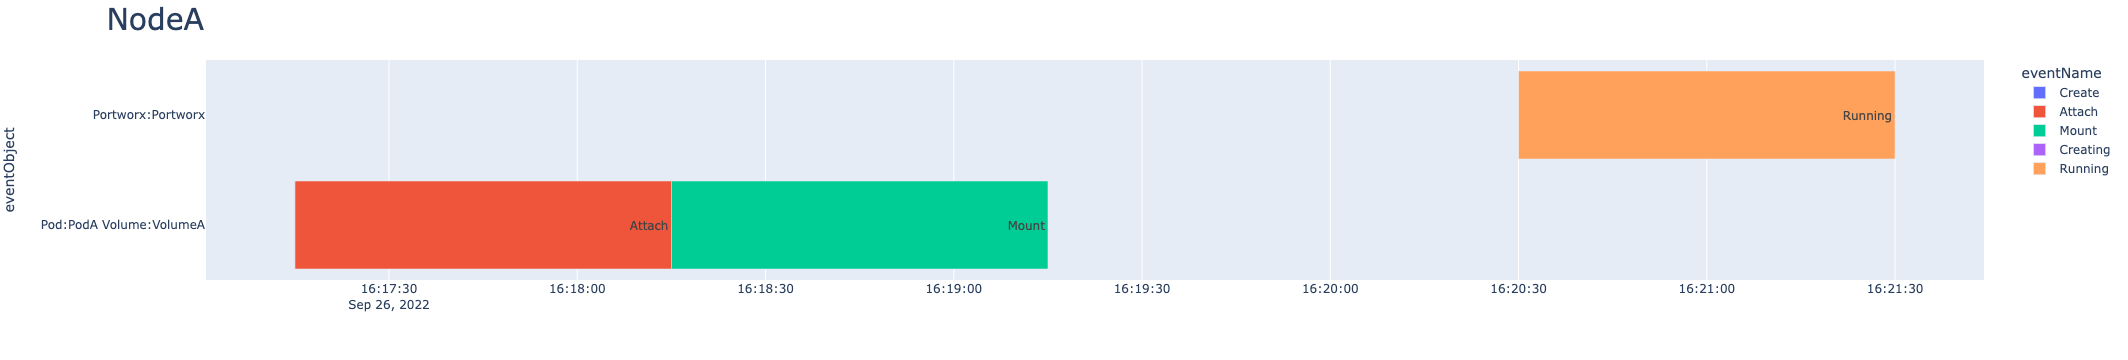

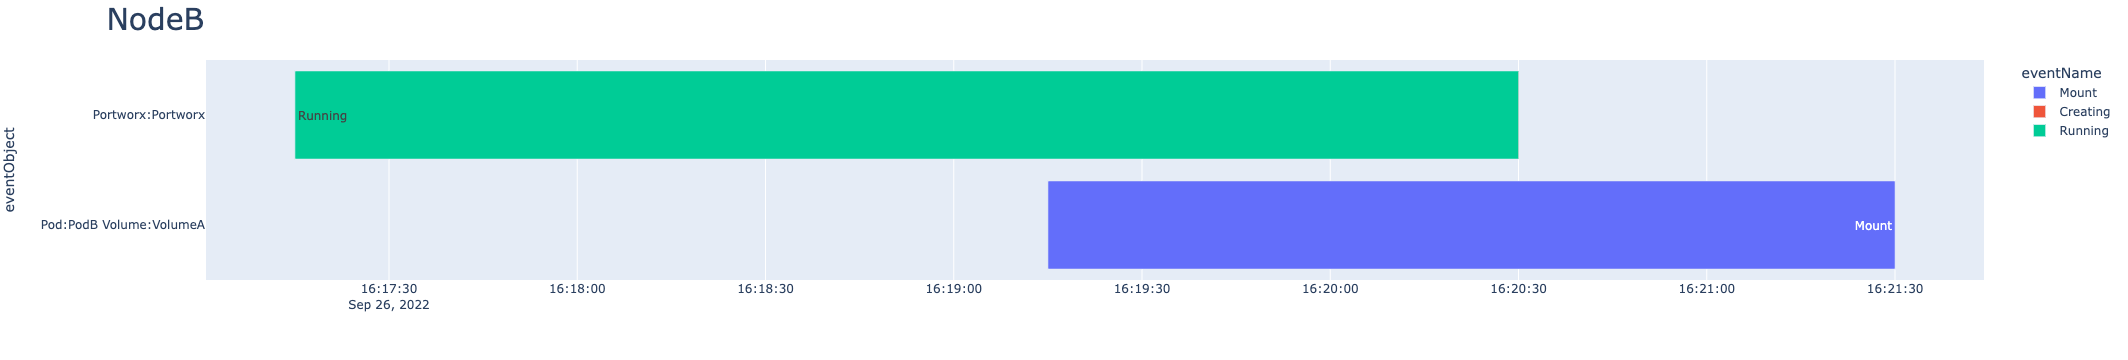

In [421]:
from plotly.subplots import make_subplots

for name, group in df.groupby('node'):
    group.head()
    fig= px.timeline(group, x_start="start", x_end="finish", y="eventObject", color="eventName", text="eventName")
    fig.update_layout(title_text=name,
                  title_font_size=30)
    fig.update_xaxes(showgrid=True)

    fig.update_traces(textposition='inside')
    #fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up

    fig.show()

In [422]:
f.close()